In [23]:
import pandas as pd
import json
def get_index(n):
    return n/46
with open('results.json') as f:
    df=json.load(f)['DMD']
names={'up':'up','down':'down','weighted':'combined'}
data=dict()
annot=[24,17,11,6,4,3,2]
for n,i in enumerate(['2','3','5','10','20','40','46']):
    data[i]=[]
    for res in df[i]:
        # line={'r':i}
        line={}
        losses=res['losses']
        f_loss=dict()
        way=res['way']
        if way=='both':
            for metric in ['weighted']:
                line={}
                losses=res['losses']
                f_loss=dict()
                line[get_index(annot[n])]=res['dice_'+metric]*100
                # line['hauss']=res['hauss_'+metric]
                # line['asd']=res['asd_'+metric]
                # line['bidir-cons-reg']=losses['bidir-cons-reg']
                # line['bidir-cons-dice']=losses['bidir-cons-dice']
                line['model']='Propagation'#names[metric]
                # del res['losses']
                line.update(f_loss)
                # for i,way in enumerate(['up','down','combined']):
                #     if way==line['way']: line['way']=f'{i}-{way}'
                data[i].append(line)
print(data['2'])
# for i in df.keys():
truc=pd.DataFrame(data['2'])
truc.sort_values('model',ascending=False,inplace=True)

table=truc.groupby(['model'],sort=True).mean()
table
for i in ['3','5','10','20','40','46']:
    if i!='2':
        truc=pd.DataFrame(data[i])
        truc.sort_values('model',ascending=False,inplace=True)

        truc=truc.groupby(['model'],sort=True).mean()
        table=pd.concat([table,truc],axis=1)
table#.T.plot()#.to_excel('res_dmd_bidir.xlsx')



[{0.5217391304347826: 92.83413290977478, 'model': 'Propagation'}]


,0.521739,0.369565,0.239130,0.130435,0.086957,0.065217,0.043478
model,,,,,,,
Propagation,92.834133,92.302477,91.378564,88.041443,82.617098,79.177779,50.711927


[{0.5217391304347826: 88.98307196419648, 'model': 'UNet'}]


<AxesSubplot:>

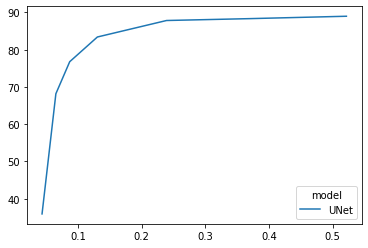

In [26]:
import pandas as pd
import json

with open('results_unet.json') as f:
    df=json.load(f)['DMD']
names={'up':'up','down':'down','weighted':'combined'}
data=dict()
annot=[24,17,11,6,4,3,2]
for n,i in enumerate(['2','3','5','10','20','40','46']):
    data[i]=[]
    res=df[i]
    # line={'r':i}
    line={}
    for metric in ['up']:
        line={}
        line[get_index(annot[n])]=res['dice_'+metric]*100
        line['model']='UNet'
        # line['hauss']=res['hauss_'+metric]
        # line['asd']=res['asd_'+metric]
        # line['bidir-cons-reg']=losses['bidir-cons-reg']
        # line['bidir-cons-dice']=losses['bidir-cons-dice']
        # del res['losses']
        # for i,way in enumerate(['up','down','combined']):
        #     if way==line['way']: line['way']=f'{i}-{way}'
        data[i].append(line)
print(data['2'])
# for i in df.keys():
truc=pd.DataFrame(data['2'])
truc.sort_values('model',ascending=False,inplace=True)

table_unet=truc.groupby(['model'],sort=True).mean()
for i in ['3','5','10','20','40','46']:
    if i!='2':
        truc=pd.DataFrame(data[i])
        truc.sort_values('model',ascending=False,inplace=True)

        truc=truc.groupby(['model'],sort=True).mean()
        table_unet=pd.concat([table_unet,truc],axis=1)
table_unet.T.plot()#.to_excel('res_dmd_bidir.xlsx')


In [31]:
import pandas as pd
import json

with open('results_interp.json') as f:
    df=json.load(f)['DMD']
names={'up':'up','down':'down','weighted':'combined'}
data=dict()
annot=[24,17,11,6,4,3,2]
for n,i in enumerate(['2','3','5','10','20','40','46']):
    data[i]=[]
    res=df[i]
    # line={'r':i}
    line={}
    for metric in ['up']:
        line={}
        line[get_index(annot[n])]=res['dice_'+metric]*100
        line['model']='Nearest-interpolation'
        # line['hauss']=res['hauss_'+metric]
        # line['asd']=res['asd_'+metric]
        # line['bidir-cons-reg']=losses['bidir-cons-reg']
        # line['bidir-cons-dice']=losses['bidir-cons-dice']
        # del res['losses']
        # for i,way in enumerate(['up','down','combined']):
        #     if way==line['way']: line['way']=f'{i}-{way}'
        data[i].append(line)
print(data['2'])
# for i in df.keys():
truc=pd.DataFrame(data['2'])
truc.sort_values('model',ascending=False,inplace=True)

table_interp=truc.groupby(['model'],sort=True).mean()
for i in ['3','5','10','20','40','46']:
    if i!='2':
        truc=pd.DataFrame(data[i])
        truc.sort_values('model',ascending=False,inplace=True)

        truc=truc.groupby(['model'],sort=True).mean()
        table_interp=pd.concat([table_interp,truc],axis=1)
table_interp#.T.plot()#.to_excel('res_dmd_bidir.xlsx')

[{0.5217391304347826: 89.8388727599584, 'model': 'Nearest-interpolation'}]


,0.521739,0.369565,0.239130,0.130435,0.086957,0.065217,0.043478
model,,,,,,,
Nearest-interpolation,89.838873,87.716453,83.034139,76.980069,63.679787,60.829412,42.066056


<AxesSubplot:>

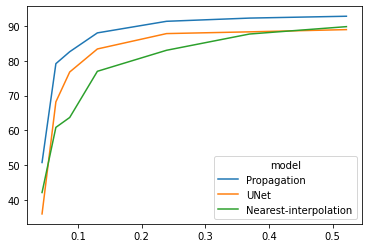

In [32]:
table_full=pd.concat([table,table_unet,table_interp])
table_full.T.plot()